In [1]:
# we are using here iris data set in which by looking at the petal and sepal size we will predict whether it is setosa or versicolor

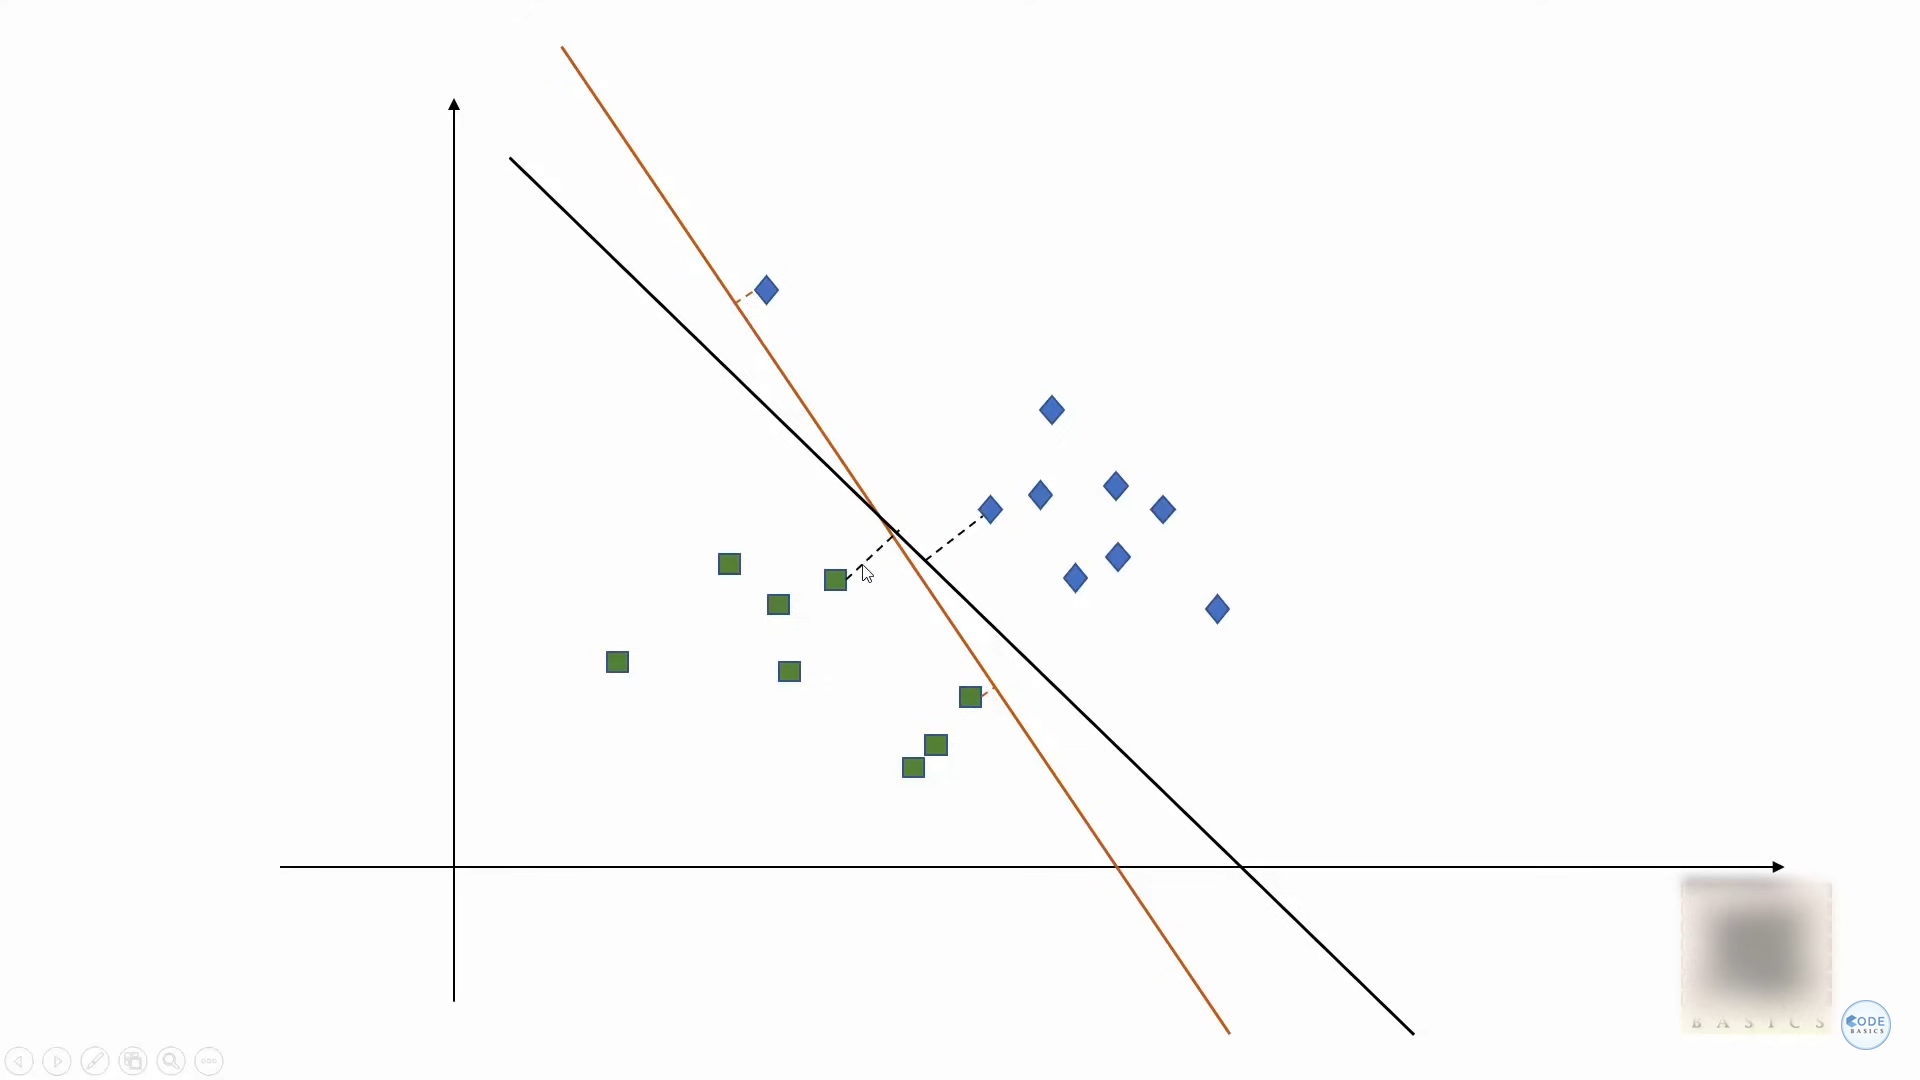

We have to decide most optimal line dividing this flowers on the basis of petal length and petal width

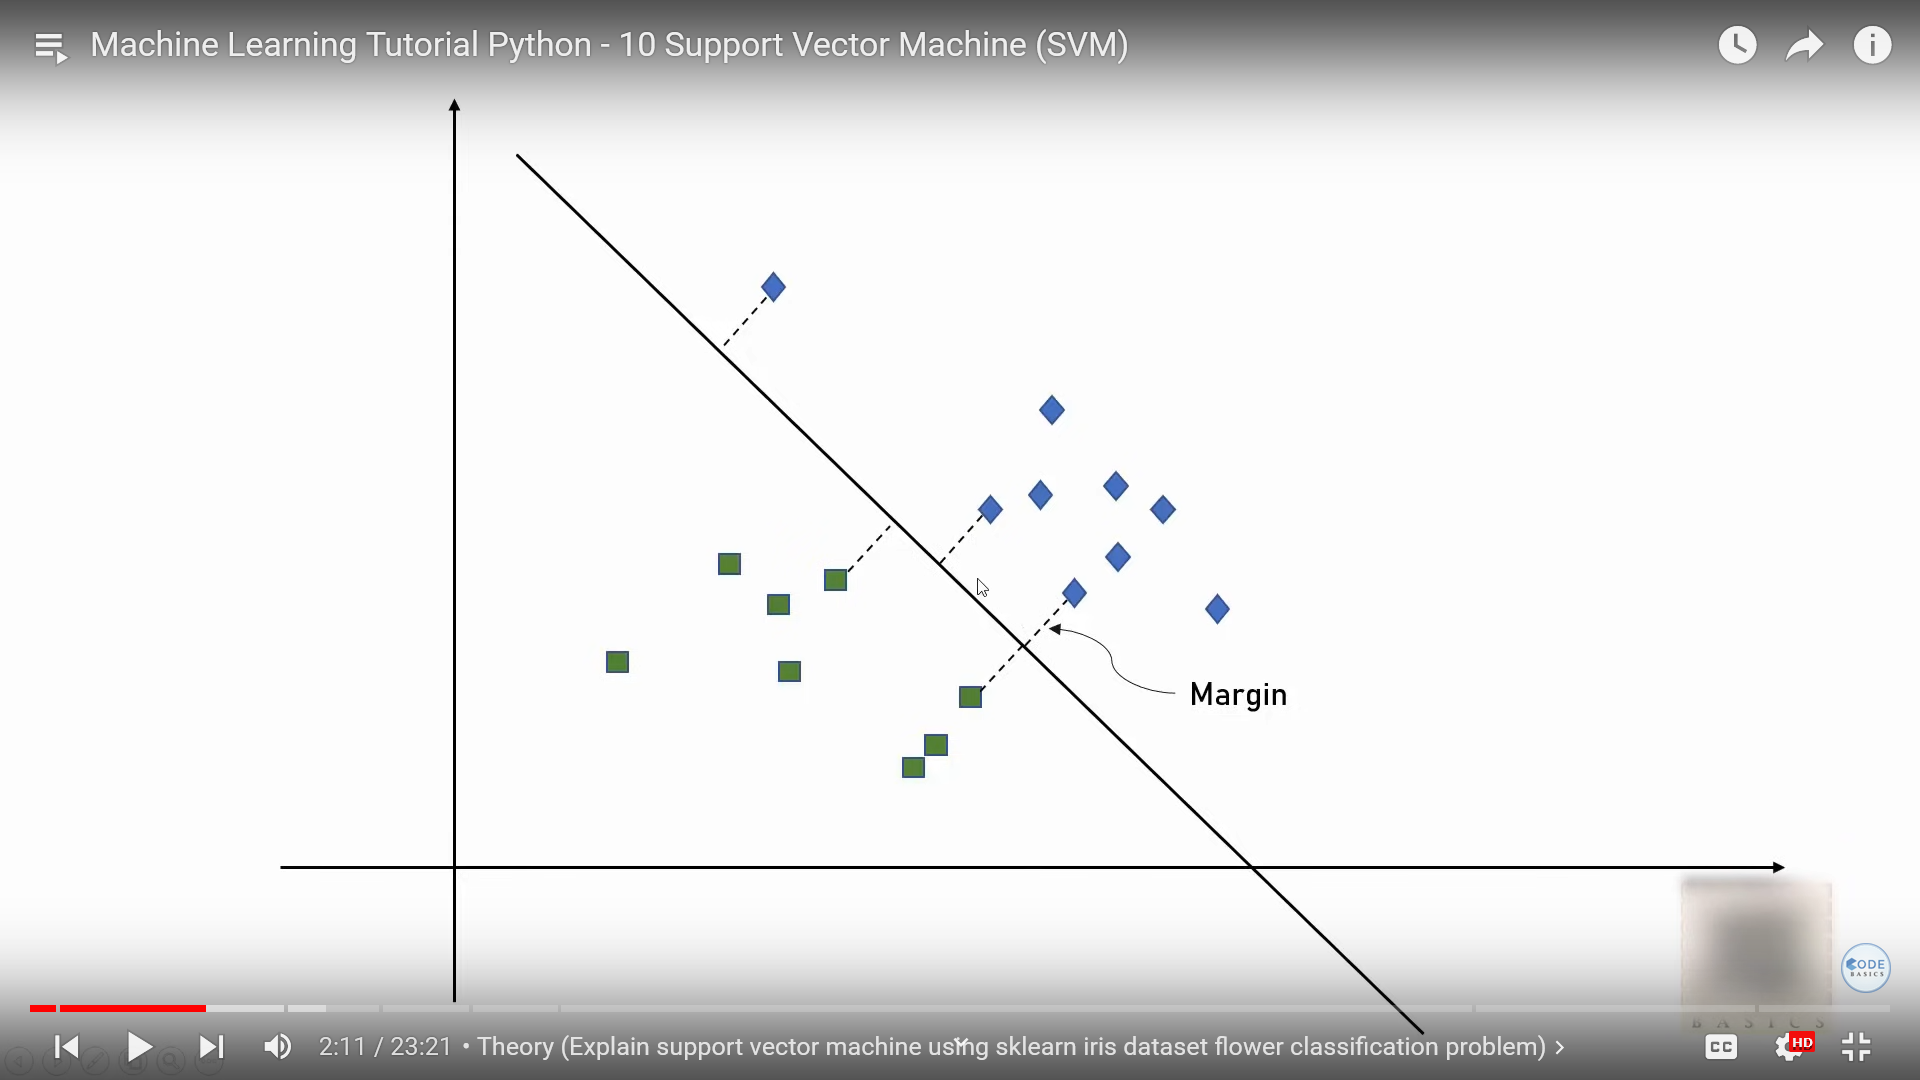

SVM maximize the margin

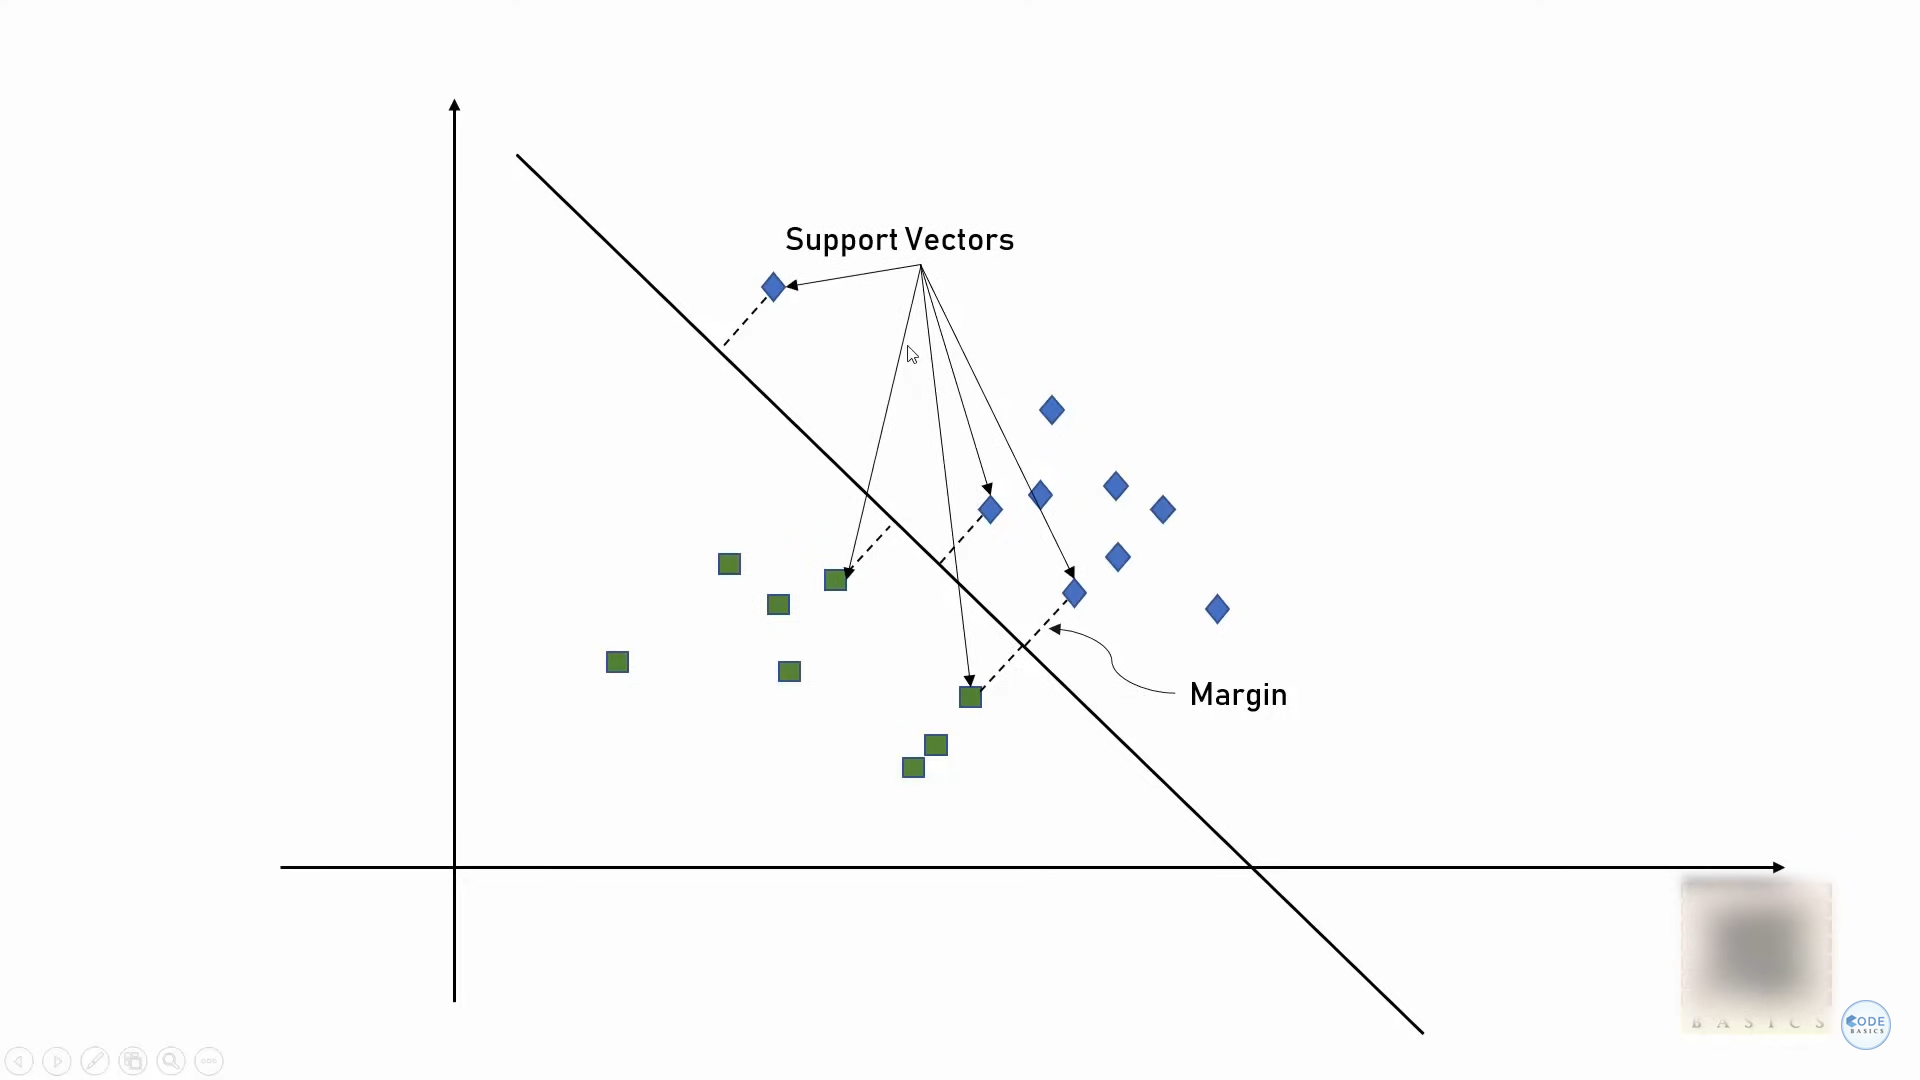

The points thats help us to find-out the margin is called as Support Vectors.

## Support vector machine drawas a hyper plane in n dimensional space such that it maximizes margin between classification groups

# Gamma and Regularization

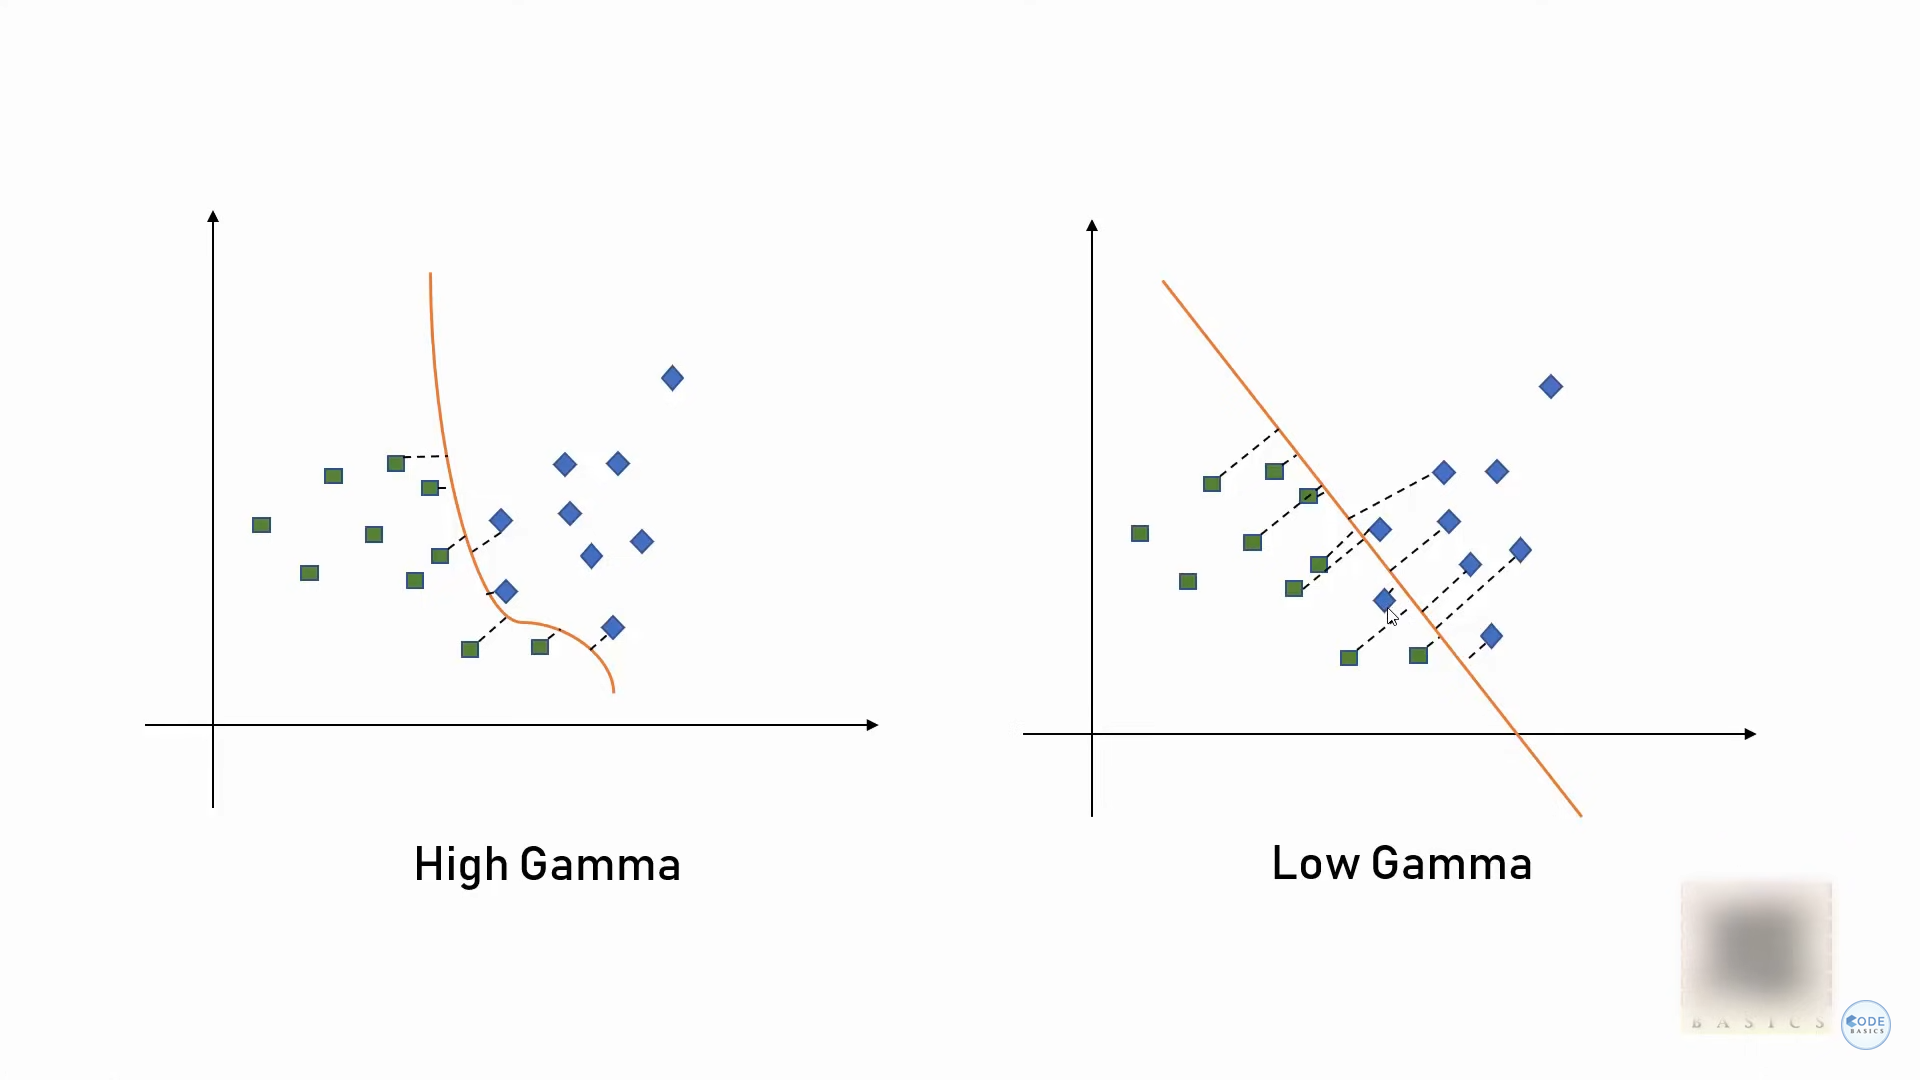

in High gamma we draw margin from the nearest points and in Low Gamma we also use the points which are far

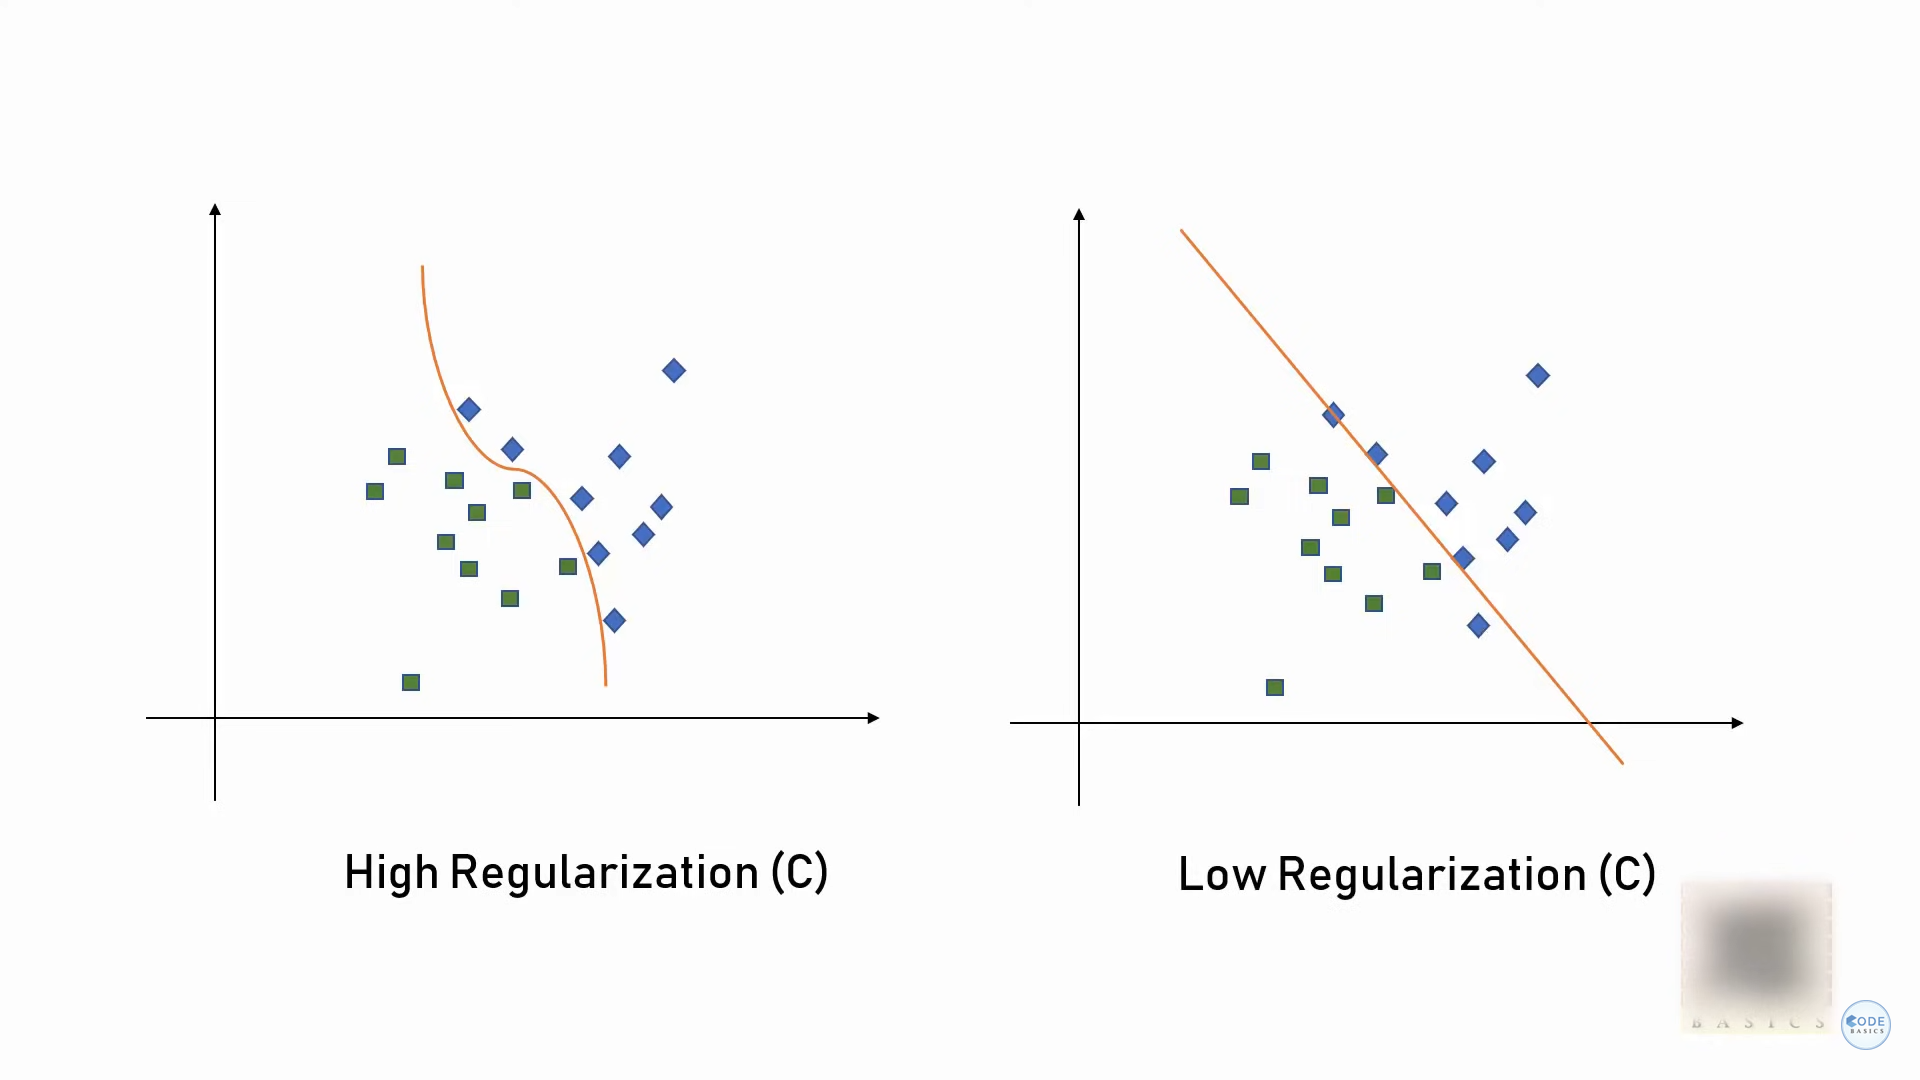

In High Regularization their is optimal and overfitting but the line is not straight but in Low Regularization the line is smooth though its not classifying as good as high

# kernel

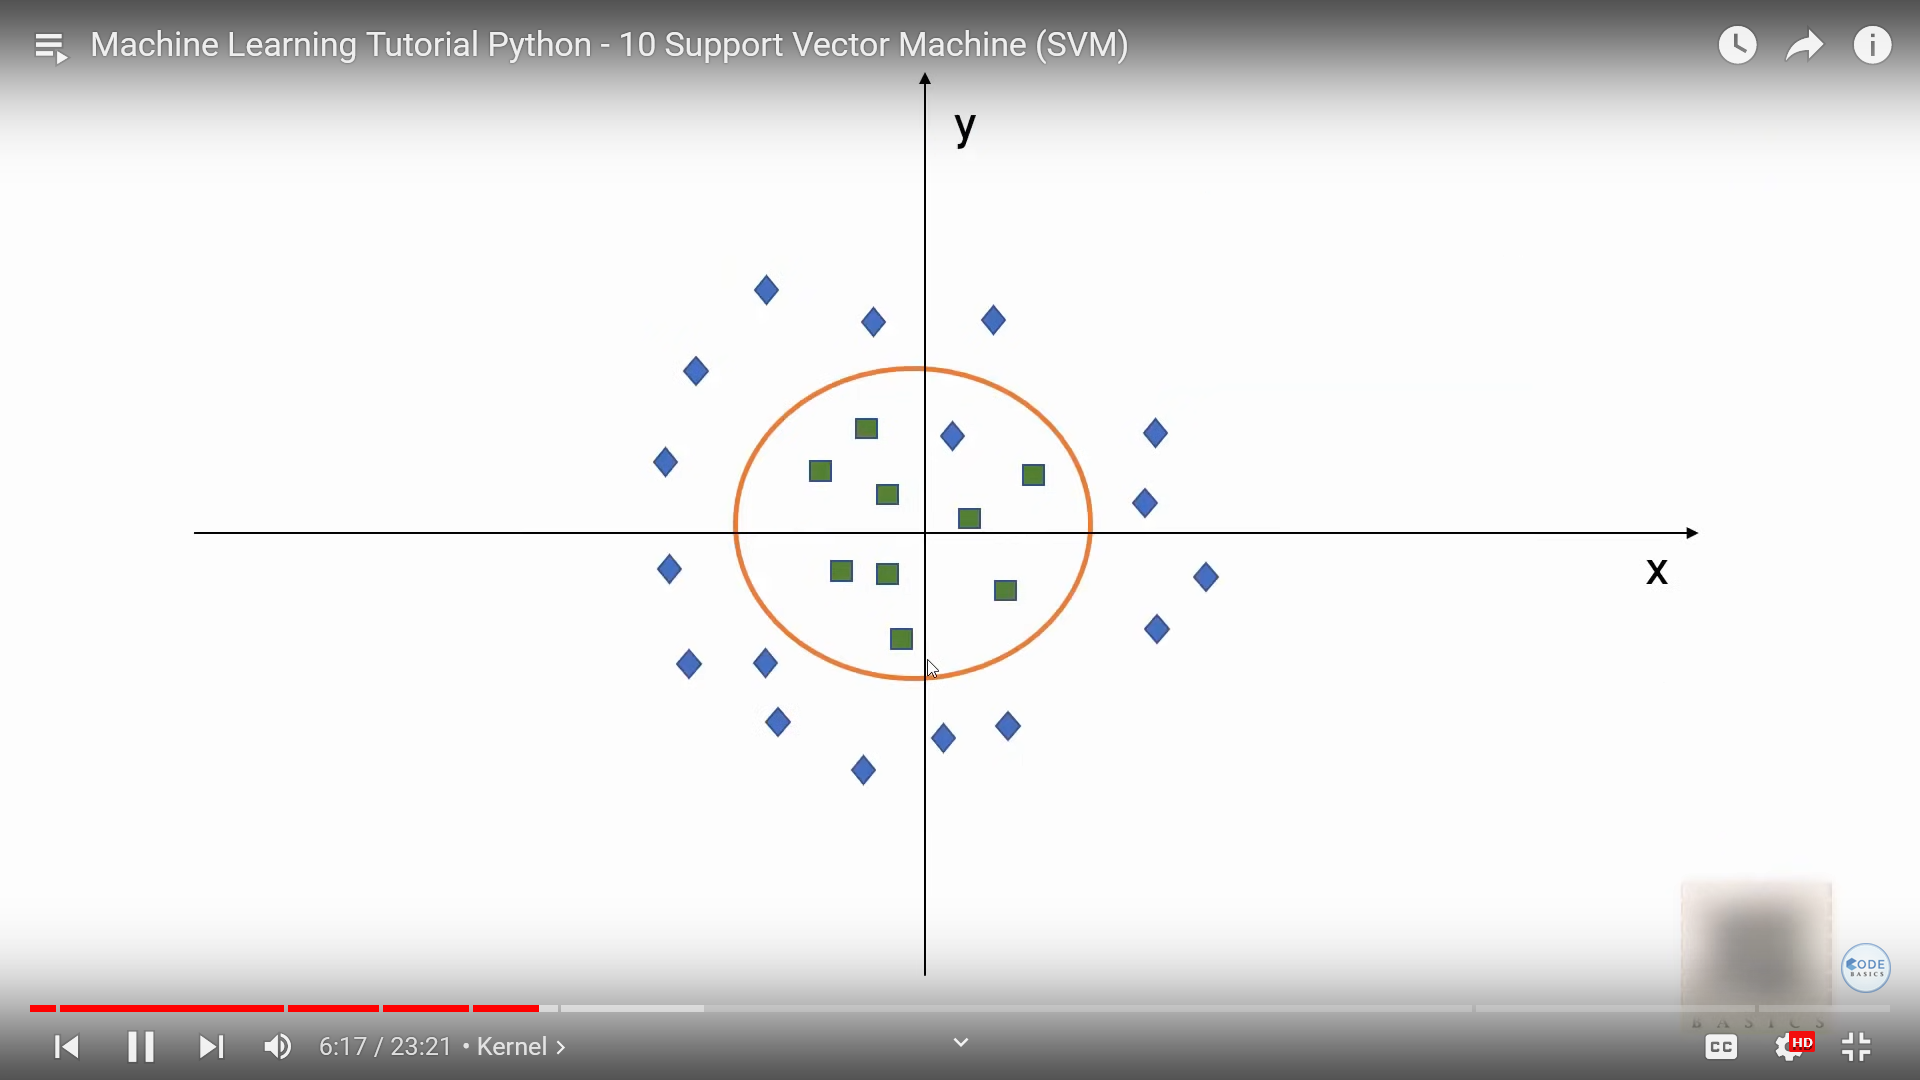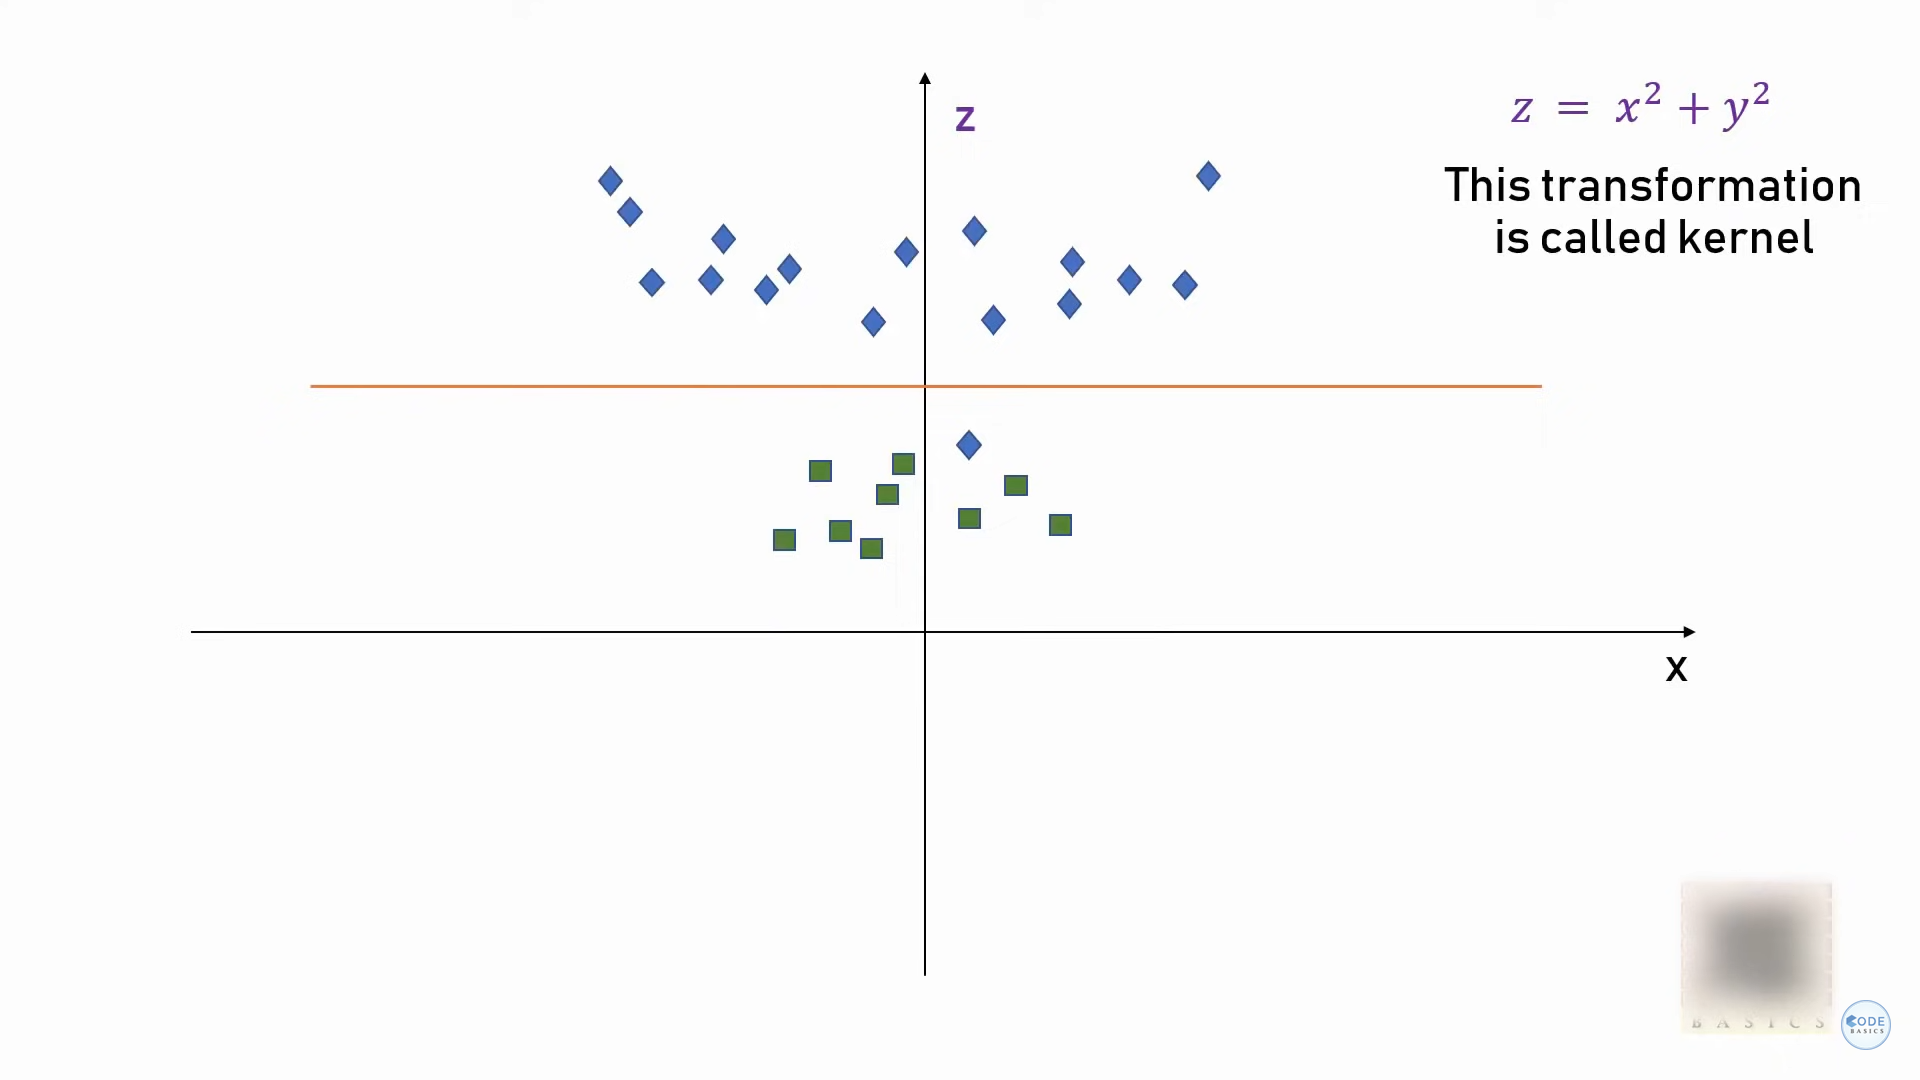

**Tranforming the dimensions for making the decision boundary is called as kernel**

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Not easy to read

In [19]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now we have the target value but in numbers we want the names so replace it with then names 

In [26]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

0 index to setosa,
1 index to versicolor,
2 index to virginica.

In [28]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
# here it changes 0,1,2 values going in the lambda function

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# plotting

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [36]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


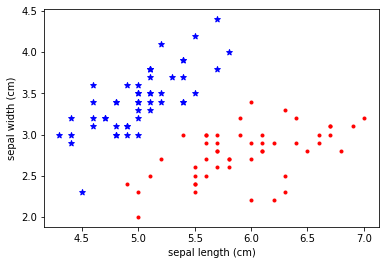

In [42]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='blue',marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='.')


Here we can easily draw our decision line using SVM

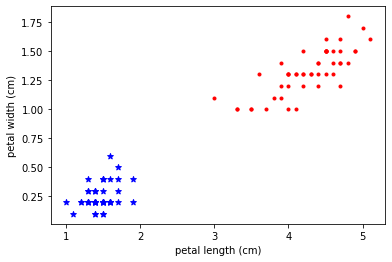

In [43]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='blue',marker='*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker='.')


In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop(['target','flower_name'],axis='columns')

In [47]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [50]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

In [51]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
63,6.1,2.9,4.7,1.4
1,4.9,3.0,1.4,0.2
66,5.6,3.0,4.5,1.5
30,4.8,3.1,1.6,0.2
71,6.1,2.8,4.0,1.3
...,...,...,...,...
149,5.9,3.0,5.1,1.8
26,5.0,3.4,1.6,0.4
93,5.0,2.3,3.3,1.0
19,5.1,3.8,1.5,0.3


In [52]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
59,5.2,2.7,3.9,1.4
112,6.8,3.0,5.5,2.1
101,5.8,2.7,5.1,1.9
20,5.4,3.4,1.7,0.2
28,5.2,3.4,1.4,0.2
2,4.7,3.2,1.3,0.2
89,5.5,2.5,4.0,1.3
116,6.5,3.0,5.5,1.8
81,5.5,2.4,3.7,1.0
62,6.0,2.2,4.0,1.0


# SVM

In [54]:
from sklearn.svm import SVC

In [62]:
model = SVC() #SVC(C) where c = regularization value if increase value of c its decrease the score

In [63]:
model.fit(X_train,y_train)

SVC()

In [59]:
model.score(X_test,y_test)

0.9666666666666667